# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 14 (Friday) 11:00 pm </b> </font>

<font color="blue"> Daniel Quach </font>

# Introduction

The objective of this assignment is to calculate which characteristic has the greatest positive effect on wine quality. The linear regression model will be used to calculate which feature of wine has the highest residual value when compared to overall wine quality. There may be more than one factor that affects this rating.

# Data

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

The data set I have chosen for this assignment is one that describes different elements of two different types of wine, either red or white, and their corresponding qualities. On the surface, there seems to be a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
data = pd.read_csv("winequalityN.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
best = data.loc[data.loc[:, 'quality'] == 9, :]
best

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [4]:
better = data.loc[data.loc[:, 'quality'] == 8, :]
better

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,white,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,white,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,white,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,white,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,red,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
6167,red,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
6301,red,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
6347,red,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


In [5]:
great = data.loc[data.loc[:, 'quality'] == 7, :]
great

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,white,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.40,7
15,white,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.99140,3.25,0.55,11.40,7
21,white,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.00,7
29,white,7.2,0.32,0.36,2.0,0.033,37.0,114.0,0.99060,3.10,0.71,12.30,7
45,white,7.4,0.18,0.31,1.4,0.058,38.0,167.0,0.99310,3.16,0.53,10.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,red,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70,7
6439,red,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
6442,red,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
6453,red,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [6]:
good = data.loc[data.loc[:, 'quality'] == 6, :]
good

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,red,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6493,red,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [7]:
average = data.loc[data.loc[:, 'quality'] <= 5, :]
average

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,white,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,5
11,white,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5
12,white,7.9,0.180,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
19,white,6.5,0.310,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,red,6.1,0.715,0.10,2.60,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
6481,red,6.2,0.460,0.29,2.10,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
6487,red,6.6,0.725,0.20,7.80,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6492,red,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Super Classs Definition

In [8]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [9]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train least-squares model
    def train(self, X, T):
        N = len(X)
        y = np.ones((N,1))
        x1 = np.hstack((y,X))
        self.w = np.linalg.pinv(x1.T@x1) @ x1.T @ T

        
    # apply the learned model to data X
    def use(self, X):
        N = len(X)
        y = np.ones((N,1))
        x1 = np.hstack((y,X))
        Y = x1 @ self.w
        return Y

### Least Mean Squares

In [69]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Least Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        N = len(X)
        for k in range(N):
            self.train_step(X[k], T[k])
            
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if(self.w is None):
            self.w = self.alpha * (x - np.log(t+1)) * x
        self.w = self.w - self.alpha * ((self.w.T @ x) - np.log(t+1)) * x
        
    # apply the current model to data X
    def use(self, X):
        Y = X @ self.w
        return Y
        

### Preliminary Test

In this following tests, we examine if the implementation is correct with a simple test data, $f(x) = -2 x + 3.2$ where $x \in \{0, 1, 2, \dots, 9, 10 \}$. 

In [54]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

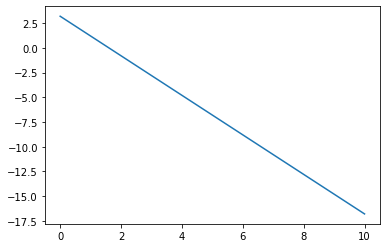

In [55]:
# least square model
ls = LinearRegress()

ls.train(X, T)
plt.plot(ls.use(X))

/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


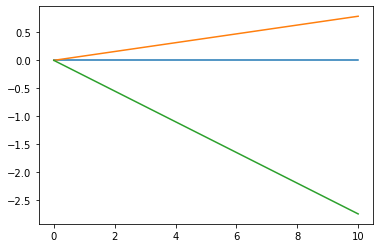

In [60]:
# least mean square model
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


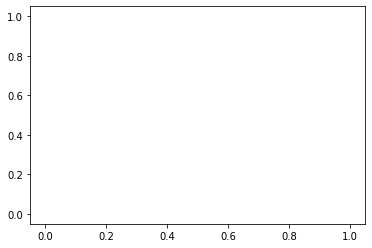

In [61]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please explain your experiments and related codes. 
**Don't forget to analyze your observations and discuss about them. **
You may have subsections of results and discussions here.


# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# References

List your references to complete your assignment. Numbered list and citing in the text are recommended. 

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [70]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))


model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract
/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


In [ ]:
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

model = LMS(0.02)
print('Time to train X:', X[0])
print('T:', T[0])
model.train_step(X[0], T[0])

err = rmse(T, model.use(X))
print(err)